# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](./img/bptt.png)


![bptt](./ecbm4040/xor/1.png)


![bptt](./ecbm4040/xor/2.jpeg)


![bptt](./ecbm4040/xor/3.jpeg)


![bptt](./ecbm4040/xor/4.jpeg)


![bptt](./ecbm4040/xor/5.jpeg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process] : Question answered above**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [2]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [3]:
from tensorflow.contrib.rnn import LSTMCell

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
#init = tf.global_variables_initializer()

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [4]:
# YOUR TRAINING AND PLOTTING CODE HERE
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
#x_train, y_train = create_dataset(num, seq)
loss_hist = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #sess.run(init)
    for e in range(700):
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        #x_train, y_train = create_dataset(num, seq)
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_hist.append(cost)
        print('epoch {}: cost = {}'.format(e+1, cost))
        
    print('Final Loss = {}'.format(cost))
        


epoch 1: cost = 0.6920875310897827
epoch 2: cost = 0.6919131278991699
epoch 3: cost = 0.6917396783828735
epoch 4: cost = 0.6915676593780518
epoch 5: cost = 0.6913977861404419
epoch 6: cost = 0.6912298202514648
epoch 7: cost = 0.6910648941993713
epoch 8: cost = 0.6909021735191345
epoch 9: cost = 0.6907427906990051
epoch 10: cost = 0.6905866861343384
epoch 11: cost = 0.6904330849647522
epoch 12: cost = 0.6902825832366943
epoch 13: cost = 0.6901353001594543
epoch 14: cost = 0.689990758895874
epoch 15: cost = 0.6898491382598877
epoch 16: cost = 0.6897103190422058
epoch 17: cost = 0.6895735859870911
epoch 18: cost = 0.6894396543502808
epoch 19: cost = 0.6893081665039062
epoch 20: cost = 0.6891786456108093
epoch 21: cost = 0.68905109167099
epoch 22: cost = 0.6889253258705139
epoch 23: cost = 0.6888013482093811
epoch 24: cost = 0.6886798143386841
epoch 25: cost = 0.688559889793396
epoch 26: cost = 0.6884406805038452
epoch 27: cost = 0.6883236765861511
epoch 28: cost = 0.6882076263427734
epoch

epoch 226: cost = 0.47886115312576294
epoch 227: cost = 0.4703039228916168
epoch 228: cost = 0.4610860347747803
epoch 229: cost = 0.4511615037918091
epoch 230: cost = 0.4404957592487335
epoch 231: cost = 0.42907094955444336
epoch 232: cost = 0.4168856143951416
epoch 233: cost = 0.40395551919937134
epoch 234: cost = 0.3903099298477173
epoch 235: cost = 0.37598854303359985
epoch 236: cost = 0.36103832721710205
epoch 237: cost = 0.3455113470554352
epoch 238: cost = 0.32947027683258057
epoch 239: cost = 0.3129937946796417
epoch 240: cost = 0.29618072509765625
epoch 241: cost = 0.27915722131729126
epoch 242: cost = 0.2620856761932373
epoch 243: cost = 0.24517442286014557
epoch 244: cost = 0.22867953777313232
epoch 245: cost = 0.2128879576921463
epoch 246: cost = 0.19807712733745575
epoch 247: cost = 0.1844656616449356
epoch 248: cost = 0.17217375338077545
epoch 249: cost = 0.16121689975261688
epoch 250: cost = 0.1515304148197174
epoch 251: cost = 0.14300216734409332
epoch 252: cost = 0.1354

epoch 440: cost = 0.01285644993185997
epoch 441: cost = 0.012766636908054352
epoch 442: cost = 0.012677701190114021
epoch 443: cost = 0.012589652091264725
epoch 444: cost = 0.01250246912240982
epoch 445: cost = 0.012416147626936436
epoch 446: cost = 0.012330666184425354
epoch 447: cost = 0.012246016412973404
epoch 448: cost = 0.012162198312580585
epoch 449: cost = 0.012079205363988876
epoch 450: cost = 0.011997010558843613
epoch 451: cost = 0.011915615759789944
epoch 452: cost = 0.011835015378892422
epoch 453: cost = 0.011755174957215786
epoch 454: cost = 0.011676128953695297
epoch 455: cost = 0.011597832664847374
epoch 456: cost = 0.01152027864009142
epoch 457: cost = 0.011443483643233776
epoch 458: cost = 0.011367423459887505
epoch 459: cost = 0.01129208318889141
epoch 460: cost = 0.011217460036277771
epoch 461: cost = 0.01114354096353054
epoch 462: cost = 0.011070339009165764
epoch 463: cost = 0.010997818782925606
epoch 464: cost = 0.010925997979938984
epoch 465: cost = 0.0108548421

epoch 651: cost = 0.004208898637443781
epoch 652: cost = 0.004192175809293985
epoch 653: cost = 0.004175545647740364
epoch 654: cost = 0.004159037489444017
epoch 655: cost = 0.004142611287534237
epoch 656: cost = 0.004126297775655985
epoch 657: cost = 0.004110078793019056
epoch 658: cost = 0.004093957133591175
epoch 659: cost = 0.004077940713614225
epoch 660: cost = 0.004062022548168898
epoch 661: cost = 0.004046207759529352
epoch 662: cost = 0.0040304702706635
epoch 663: cost = 0.004014840815216303
epoch 664: cost = 0.003999308682978153
epoch 665: cost = 0.003983865492045879
epoch 666: cost = 0.003968514502048492
epoch 667: cost = 0.003953271545469761
epoch 668: cost = 0.003938101697713137
epoch 669: cost = 0.003923035692423582
epoch 670: cost = 0.003908053040504456
epoch 671: cost = 0.0038931670133024454
epoch 672: cost = 0.003878355259075761
epoch 673: cost = 0.0038636447861790657
epoch 674: cost = 0.003849021391943097
epoch 675: cost = 0.0038344822824001312
epoch 676: cost = 0.0038

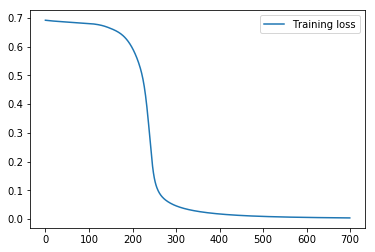

In [5]:
plt.plot(loss_hist, label = 'Training loss')
plt.legend()
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [6]:
from ecbm4040.xor.rnn import MyLSTMCell

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [7]:
# YOUR TRAINING AND PLOTTING CODE HERE

# YOUR TRAINING AND PLOTTING CODE HERE
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
#x_train, y_train = create_dataset(num, seq)
loss_hist = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #sess.run(init)
    for e in range(100):
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        #x_train, y_train = create_dataset(num, seq)
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_hist.append(cost)
        print('epoch {}: cost = {}'.format(e+1, cost))
        
    print('Final Loss = {}'.format(cost))
        


epoch 1: cost = 0.7026192545890808
epoch 2: cost = 0.7506625056266785
epoch 3: cost = 0.6859917044639587
epoch 4: cost = 0.7014665603637695
epoch 5: cost = 0.6963295340538025
epoch 6: cost = 0.6861204504966736
epoch 7: cost = 0.6835166811943054
epoch 8: cost = 0.677245557308197
epoch 9: cost = 0.6733841300010681
epoch 10: cost = 0.6631491184234619
epoch 11: cost = 0.6281051635742188
epoch 12: cost = 0.5379560589790344
epoch 13: cost = 0.5614650249481201
epoch 14: cost = 0.6406842470169067
epoch 15: cost = 0.6570659279823303
epoch 16: cost = 0.5312662720680237
epoch 17: cost = 0.5284314155578613
epoch 18: cost = 0.4691549241542816
epoch 19: cost = 0.47336557507514954
epoch 20: cost = 0.3944903612136841
epoch 21: cost = 0.30825209617614746
epoch 22: cost = 0.22952789068222046
epoch 23: cost = 0.18050983548164368
epoch 24: cost = 0.16039200127124786
epoch 25: cost = 0.15318506956100464
epoch 26: cost = 0.1384747326374054
epoch 27: cost = 0.10997714847326279
epoch 28: cost = 0.082350984215

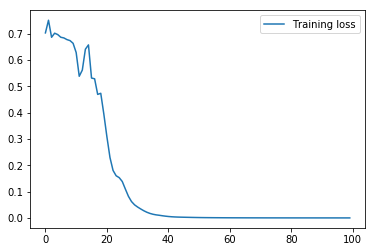

In [8]:
plt.plot(loss_hist, label = 'Training loss')
plt.legend()
plt.show()

In [9]:
import tensorflow as tf
print (tf.__file__)

/home/ecbm4040/.local/lib/python3.5/site-packages/tensorflow/__init__.py
